**1.CHARGER DATASET**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = '/content/stackoverflow_full.csv'

df = pd.read_csv(url)

print(df.head())


   Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
0           0  <35            No         Master           1    Man   
1           1  <35            No  Undergraduate           1    Man   
2           2  <35            No         Master           1    Man   
3           3  <35            No  Undergraduate           1    Man   
4           4  >35            No            PhD           0    Man   

  MentalHealth MainBranch  YearsCode  YearsCodePro    Country  PreviousSalary  \
0           No        Dev          7             4     Sweden         51552.0   
1           No        Dev         12             5      Spain         46482.0   
2           No        Dev         15             6    Germany         77290.0   
3           No        Dev          9             6     Canada         46135.0   
4           No     NotDev         40            30  Singapore        160932.0   

                                      HaveWorkedWith  ComputerSkills  Employed  
0          

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [111]:
df = df.drop(columns=['Unnamed: 0'])


In [112]:
df = df.drop(columns=['Accessibility', 'MentalHealth', 'Country', 'HaveWorkedWith'])


In [ ]:
# Filtrer pour ne garder que 'Man' et 'Woman'
df_filtered = df[df['Gender'].isin(['Man', 'Woman'])]

print(df_filtered['Gender'].unique())
df.head()


['Man' 'Woman']


,Age,EdLevel,Employment,Gender,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
0,<35,Master,1,Man,Dev,7,4,51552.0,4,0
1,<35,Undergraduate,1,Man,Dev,12,5,46482.0,12,1
2,<35,Master,1,Man,Dev,15,6,77290.0,7,0
3,<35,Undergraduate,1,Man,Dev,9,6,46135.0,13,0
4,>35,PhD,0,Man,NotDev,40,30,160932.0,2,0


Répartition du genre dans le dataset:
Gender
Man      68573
Woman     3518
Name: count, dtype: int64


<ipython-input-114-d7f17312d7b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_filtered, palette='Set2')


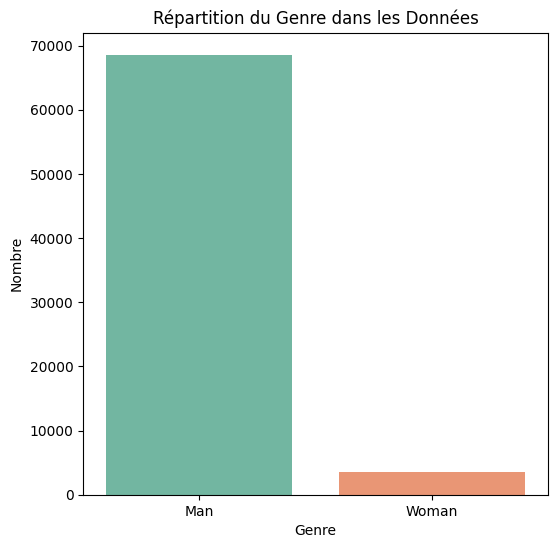

In [114]:
gender_counts = df_filtered['Gender'].value_counts()
print("Répartition du genre dans le dataset:")
print(gender_counts)

plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df_filtered, palette='Set2')
plt.title('Répartition du Genre dans les Données')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.show()


Répartition des âges par genre:
Gender  Age
Man     <35    44343
        >35    24230
Woman   <35     2580
        >35      938
Name: count, dtype: int64


<ipython-input-115-fff01aea4f2d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df_filtered, palette='Set2')


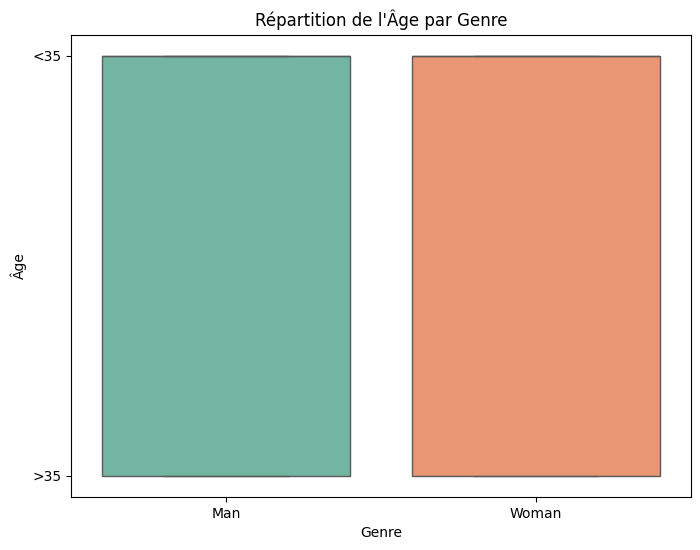

In [115]:
age_by_gender = df_filtered.groupby('Gender')['Age'].value_counts()
print("Répartition des âges par genre:")
print(age_by_gender)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df_filtered, palette='Set2')
plt.title('Répartition de l\'Âge par Genre')
plt.xlabel('Genre')
plt.ylabel('Âge')
plt.show()


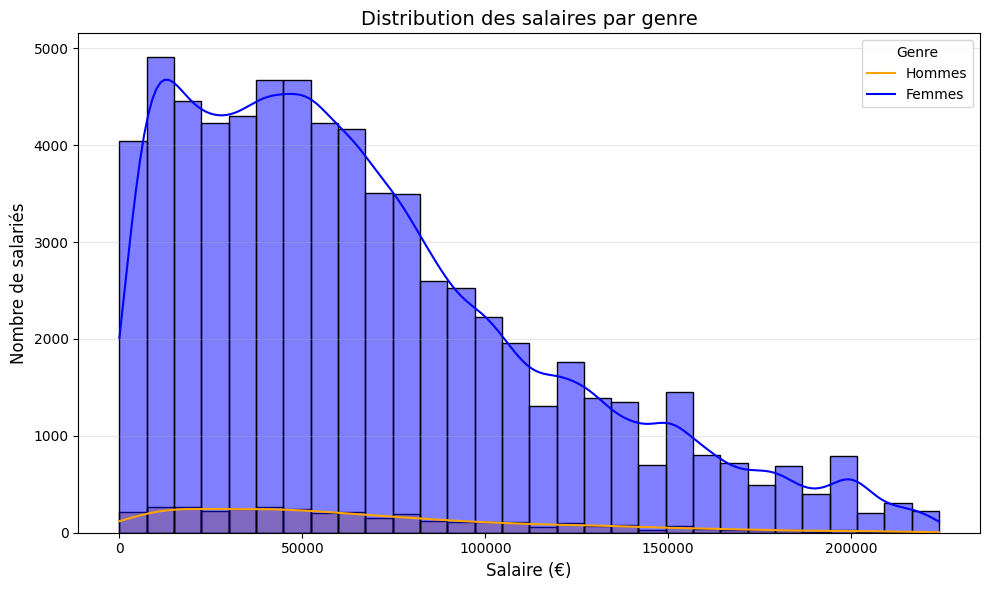

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_filtered,
    x='PreviousSalary',
    hue='Gender',
    bins=30,
    kde=True,
    palette={'Man':'blue', 'Woman':'orange'},
    alpha=0.5 
)

plt.title('Distribution des salaires par genre', fontsize=14)
plt.xlabel('Salaire (€)', fontsize=12)
plt.ylabel('Nombre de salariés', fontsize=12)
plt.legend(title='Genre', labels=['Hommes', 'Femmes'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

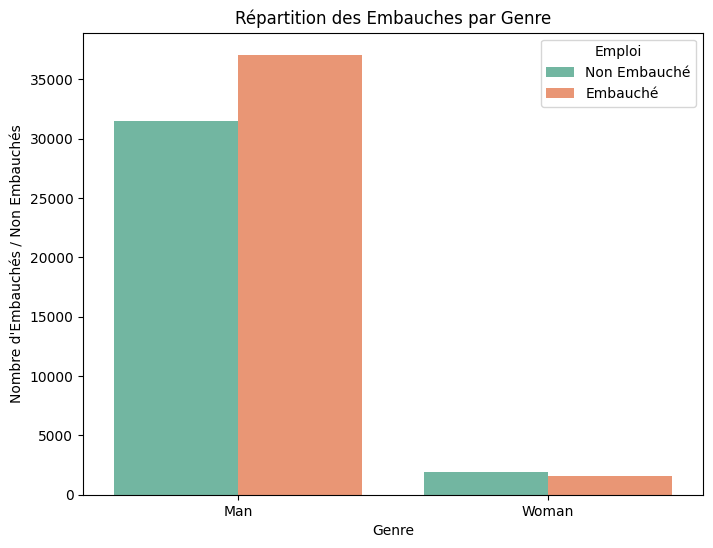

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Employed', data=df_filtered, palette='Set2')
plt.title('Répartition des Embauches par Genre')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'Embauchés / Non Embauchés')
plt.legend(title='Emploi', labels=['Non Embauché', 'Embauché'])
plt.show()


In [ ]:
df_filtered['Gender'] = df_filtered['Gender'].map({'Man': 1, 'Woman': 0})  
df_filtered['Age'] = df_filtered['Age'].map({'<35': 0, '>35': 1}) 


<ipython-input-118-08b21fee5d8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Gender'] = df_filtered['Gender'].map({'Man': 1, 'Woman': 0})  # 0 pour Man, 1 pour Woman
<ipython-input-118-08b21fee5d8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age'] = df_filtered['Age'].map({'<35': 0, '>35': 1})  # 0 pour <35, 1 pour >35


In [119]:
df_filtered = pd.get_dummies(df_filtered, columns=['EdLevel', 'MainBranch'], drop_first=True)


In [120]:
df_filtered.head()

,Age,Employment,Gender,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MainBranch_NotDev
0,0,1,1,7,4,51552.0,4,0,False,False,False,False,False
1,0,1,1,12,5,46482.0,12,1,False,False,False,True,False
2,0,1,1,15,6,77290.0,7,0,False,False,False,False,False
3,0,1,1,9,6,46135.0,13,0,False,False,False,True,False
4,1,0,1,40,30,160932.0,2,0,False,False,True,False,True


**ENTRAINEMENT DONNEES AVEC BIAS**

In [ ]:
X = df_filtered.drop(columns=['Employed'])  
y = df_filtered['Employed']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      0.55      0.64      6622
           1       0.69      0.85      0.76      7797

    accuracy                           0.71     14419
   macro avg       0.72      0.70      0.70     14419
weighted avg       0.72      0.71      0.70     14419



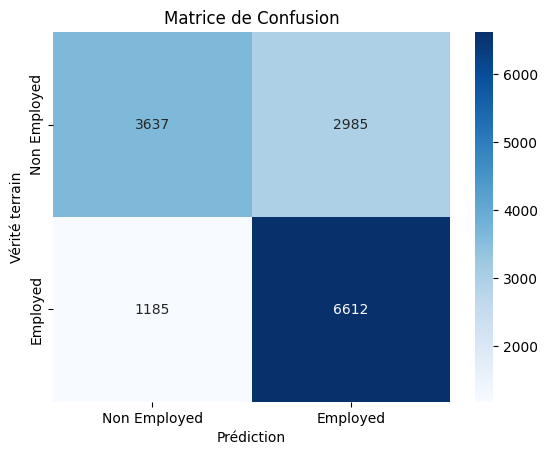

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non Employed', 'Employed'], yticklabels=['Non Employed', 'Employed'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.show()

df_test = X_test.copy()
df_test['True_Label'] = y_test
df_test['Predicted_Label'] = y_pred
df_test['Gender'] = X_test['Gender'] 


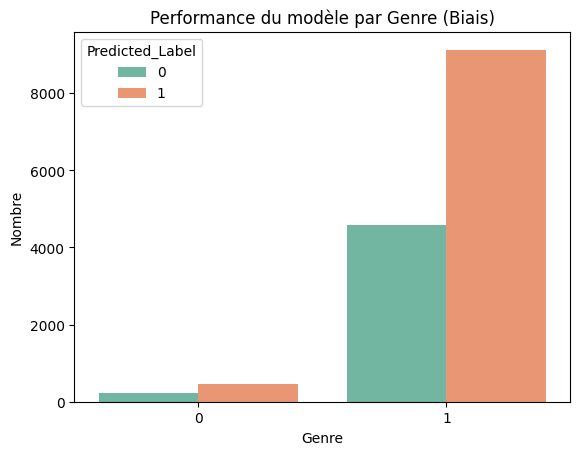

In [ ]:

sns.countplot(x='Gender', hue='Predicted_Label', data=df_test, palette='Set2')
plt.title('Performance du modèle par Genre (Biais)')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.show()


In [ ]:
gender_acceptance_before = df_test.groupby('Gender')['Predicted_Label'].value_counts(normalize=True).unstack().fillna(0)
gender_acceptance_before = gender_acceptance_before[1]
print("Taux d'acceptation avant correction du biais :")
print(gender_acceptance_before)


Taux d'acceptation avant correction du biais :
Gender
0    0.663380
1    0.665694
Name: 1, dtype: float64


In [96]:
!pip install aif360
!pip install BlackBoxAuditing

**APPLICATION DE AIF360**

In [ ]:
from aif360.datasets import BinaryLabelDataset

dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df_filtered,
    label_names=['Employed'],
    protected_attribute_names=['Gender'],
    privileged_protected_attributes=[[1]] 
)


In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover

dir = DisparateImpactRemover(repair_level=1.0)  
dataset_transformed = dir.fit_transform(dataset)


In [ ]:
print(dataset_transformed.features[:5])  

[[0.00000e+00 1.00000e+00 1.00000e+00 7.00000e+00 3.00000e+00 4.29600e+04
  3.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 1.00000e+00 1.20000e+01 4.00000e+00 3.89160e+04
  8.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 1.00000e+00 1.50000e+01 5.00000e+00 6.58160e+04
  5.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 1.00000e+00 9.00000e+00 5.00000e+00 3.84000e+04
  9.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00]
 [1.00000e+00 0.00000e+00 1.00000e+00 3.90000e+01 2.60000e+01 1.43392e+05
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00]]


In [ ]:
X = dataset_transformed.features 
y = dataset_transformed.labels  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7664886607947846
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      6622
         1.0       0.78      0.79      0.79      7797

    accuracy                           0.77     14419
   macro avg       0.77      0.76      0.76     14419
weighted avg       0.77      0.77      0.77     14419



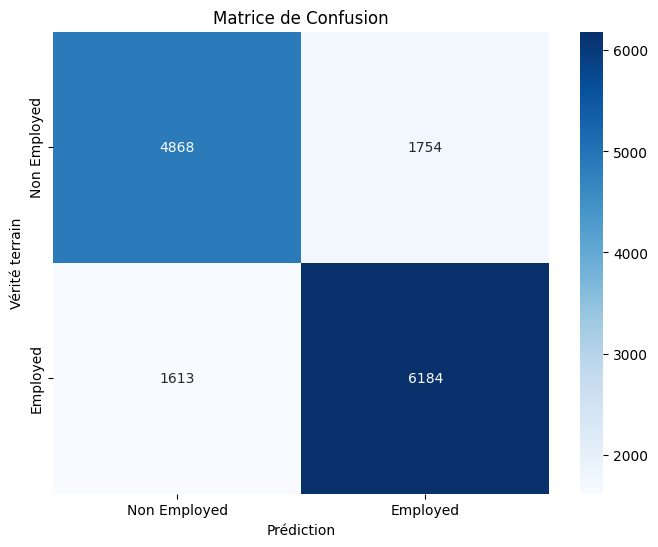

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non Employed', 'Employed'], yticklabels=['Non Employed', 'Employed'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.show()


Taux d'acceptation avant correction:
Gender
0    0.663380
1    0.665694
Name: 1, dtype: float64

Taux d'acceptation après correction:
Gender
0    0.812676
1    0.536947
Name: 1.0, dtype: float64


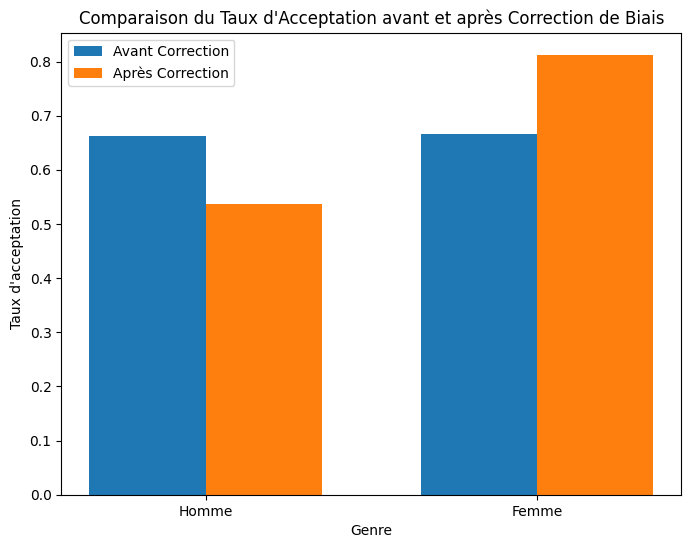


Statistiques des taux d'acceptation avant et après correction:
Homme:
  Avant correction: 66.57%
  Après correction: 53.69%

Femme:
  Avant correction: 66.34%
  Après correction: 81.27%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gender_acceptance_before = df_test.groupby('Gender')['Predicted_Label'].value_counts(normalize=True).unstack().fillna(0)
gender_acceptance_before = gender_acceptance_before[1]  

gender_acceptance_after = df_test_corrected.groupby('Gender')['Predicted_Label'].value_counts(normalize=True).unstack().fillna(0)
gender_acceptance_after = gender_acceptance_after[1]  

print("Taux d'acceptation avant correction:")
print(gender_acceptance_before)
print("\nTaux d'acceptation après correction:")
print(gender_acceptance_after)

gender_acceptance_after_inverted = gender_acceptance_after[::-1]

labels = ['Homme', 'Femme']
acceptance_before = gender_acceptance_before.values
acceptance_after = gender_acceptance_after_inverted.values  

x = np.arange(len(labels))  
width = 0.35  
fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width/2, acceptance_before, width, label='Avant Correction')
rects2 = ax.bar(x + width/2, acceptance_after, width, label='Après Correction')

ax.set_xlabel('Genre')
ax.set_ylabel('Taux d\'acceptation')
ax.set_title('Comparaison du Taux d\'Acceptation avant et après Correction de Biais')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

print("\nStatistiques des taux d'acceptation avant et après correction:")
print("Homme:")
print(f"  Avant correction: {gender_acceptance_before[1]*100:.2f}%")
print(f"  Après correction: {gender_acceptance_after[1]*100:.2f}%")
print("\nFemme:")
print(f"  Avant correction: {gender_acceptance_before[0]*100:.2f}%")
print(f"  Après correction: {gender_acceptance_after[0]*100:.2f}%")
